# Model EMC-GCN beserta Evaluasinya

### Percobaan Setelah Ubah Logic ✩°𓏲⋆🌿. ⋆⸜ 🍵✮˚

### Set Up

In [ ]:
import torch 
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

In [ ]:
import torch
print(f"Allocated: {torch.cuda.memory_allocated() / 1024 ** 3:.2f} GB")
print(f"Cached: {torch.cuda.memory_reserved() / 1024 ** 3:.2f} GB")

In [ ]:
# Supaya gaperlu restart kernel tiap edit
%load_ext autoreload
%autoreload 2

In [ ]:
!pip uninstall pyabsa 

In [1]:
from PyABSA import pyabsa

/home/riset/.local/lib/python3.10/site-packages/spacy/cli/_util.py:23: DeprecationWarning: Importing 'parser.split_arg_string' is deprecated, it will only be available in 'shell_completion' in Click 9.0.
  from click.parser import split_arg_string
/home/riset/.local/lib/python3.10/site-packages/weasel/util/config.py:8: DeprecationWarning: Importing 'parser.split_arg_string' is deprecated, it will only be available in 'shell_completion' in Click 9.0.
  from click.parser import split_arg_string


[2025-06-06 12:42:48] (2.4.1.post1) PyABSA(2.4.1.post1): If your code crashes on Colab, please use the GPU runtime. Then run "pip install pyabsa[dev] -U" and restart the kernel.
Or if it does not work, you can use v1.x versions, e.g., pip install pyabsa<2.0 -U




Try to downgrade transformers<=4.29.0.






/drive0-storage/TA_Ista/Coba/PyABSA/pyabsa/framework/checkpoint_class/checkpoint_utils.py:11: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  from distutils.version import StrictVersion
2025-06-06 12:42:48.611134: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-06 12:42:49.374014: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=1>
  _warn(f"unclosed running multiprocessing pool {self!r}",


[2025-06-06 12:43:00] (2.4.1.post1) PyABSA(2.4.1.post1): If your code crashes on Colab, please use the GPU runtime. Then run "pip install pyabsa[dev] -U" and restart the kernel.
Or if it does not work, you can use v1.x versions, e.g., pip install pyabsa<2.0 -U




Try to downgrade transformers<=4.29.0.






In [2]:
from pyabsa import download_all_available_datasets

download_all_available_datasets()

[2025-06-05 14:34:00] (2.4.1.post1) Datasets already exist in /drive0-storage/TA_Ista/Coba/integrated_datasets, skip download ya TabyTaby


In [2]:
from pyabsa import DatasetItem

dataset = '724.desa_wisata_2500_newest'

### Cek Persebaran

In [10]:
import ast

# Path file
FILE = 'integrated_datasets/aste_datasets/724.desa_wisata_2500_newest/all_2500data_newest.txt'

# Inisialisasi penghitung
total_reviews = 0
total_triplets = 0
pos_count = 0
neg_count = 0
neu_count = 0

# Baca file baris per baris
with open(FILE, 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        if not line or '####' not in line:
            continue  # skip baris kosong atau salah format

        total_reviews += 1

        try:
            _, triplet_str = line.split('####', 1)
            triplet_list = ast.literal_eval(triplet_str.strip())
        except (ValueError, SyntaxError):
            continue  # skip jika parsing gagal

        total_triplets += len(triplet_list)

        for aspect, opinion, sentiment in triplet_list:
            if sentiment.upper() == 'POS':
                pos_count += 1
            elif sentiment.upper() == 'NEG':
                neg_count += 1
            elif sentiment.upper() == 'NEU':
                neu_count += 1

# Cetak hasil
print(f"Jumlah ulasan       : {total_reviews}")
print(f"Jumlah triplet      : {total_triplets}")
print(f"Sentimen positif    : {pos_count}")
print(f"Sentimen negatif    : {neg_count}")
print(f"Sentimen netral     : {neu_count}")


Jumlah ulasan       : 2511
Jumlah triplet      : 5973
Sentimen positif    : 4332
Sentimen negatif    : 661
Sentimen netral     : 980


#### Persebaran Data Grafik

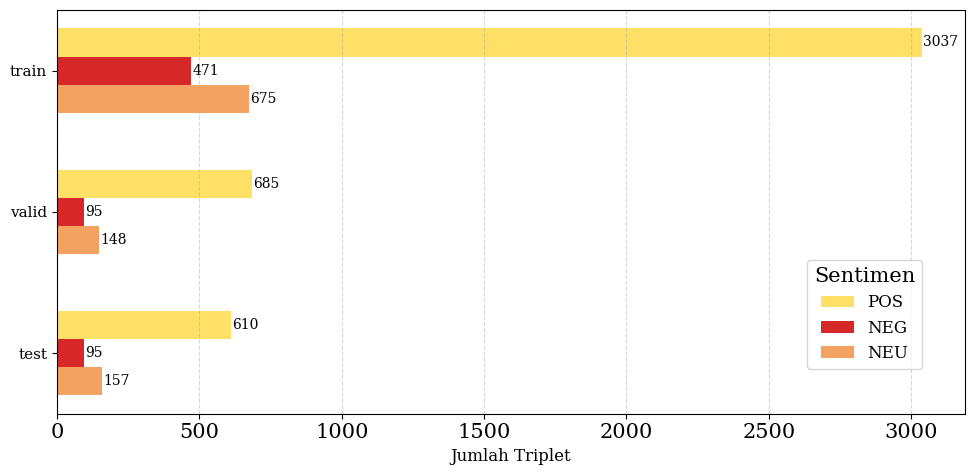

In [ ]:
import ast
import os
import matplotlib.pyplot as plt

# Tetap pakai urutan ini
labels = ['train', 'valid', 'test']
splits = [f"{label}.txt" for label in labels]
base_path = 'integrated_datasets/aste_datasets/724.desa_wisata_2500_newest'

# Ambil data triplet per sentimen
result_summary = {label: {} for label in labels}
for label, split_file in zip(labels, splits):
    filepath = os.path.join(base_path, split_file)
    pos_count = neg_count = neu_count = 0
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line or '####' not in line:
                continue
            try:
                _, triplet_str = line.split('####', 1)
                triplet_list = ast.literal_eval(triplet_str.strip())
            except:
                continue
            for _, _, sentiment in triplet_list:
                sentiment = sentiment.upper()
                if sentiment == 'POS':
                    pos_count += 1
                elif sentiment == 'NEG':
                    neg_count += 1
                elif sentiment == 'NEU':
                    neu_count += 1
    result_summary[label] = {
        'POS': pos_count,
        'NEG': neg_count,
        'NEU': neu_count
    }

# Visualisasi
metric_names = ['POS', 'NEG', 'NEU']
# Warna sesuai urutan: POS (kuning), NEG (merah), NEU (oranye)
colors = ['#ffe066', '#d62828', '#f4a261']

plt.figure(figsize=(10, 5))
bar_width = 0.2

# Y manual agar urutan train → valid → test
y_base = [2, 1, 0]

# Urutan batang per kategori: POS (atas), NEG (tengah), NEU (bawah)
for i, metric in enumerate(metric_names):
    bar_positions = [y + (2-i) * bar_width for y in y_base]  # (2-i) membalik urutan
    values = [result_summary[label][metric] for label in labels]
    
    plt.barh(
        bar_positions,
        values,
        height=bar_width,
        label=metric,
        color=colors[i]
    )
    
    for j, val in enumerate(values):
        plt.text(val + 5, bar_positions[j], str(val), va='center', fontsize=10)

center_y = [y + bar_width for y in y_base]
plt.yticks(center_y, labels, fontsize=11)
plt.xlabel('Jumlah Triplet', fontsize=12)
# plt.title('Distribusi Triplet Sentimen per Dataset Split', fontsize=14)

plt.legend(loc='lower right', fontsize=12, title='Sentimen', bbox_to_anchor=(0.98, 0.05), borderaxespad=1.5)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.savefig('distribusi triplet sentimen.png', dpi=300, bbox_inches='tight')
plt.show()

### ⭐️ Train Model

In [ ]:
from pyabsa import AspectSentimentTripletExtraction as ASTE
from pyabsa import ModelSaveOption, DeviceTypeOption
import warnings

# Mematikan warnings
# warnings.filterwarnings("ignore")

# Konfigurasi Model
config =(ASTE.ASTEConfigManager.get_aste_config_multilingual())

config.model = ASTE.ASTEModelList.EMCGCN
config.pretrained_bert = "indobenchmark/indobert-large-p2"
# config.pretrained_bert = 'bert-base-multilingual-uncased'

config.max_seq_len = 100
config.batch_size = 16 # cek
config.cache_dataset = False
config.use_fp16 = False
config.learning_rate = 2e-5 # cek
config.num_epoch = 50
config.patience = 999
config.evaluate_begin = 0
config.emb_dropout = 0.5 # cek
config.dropout = 0.5 # ga ngaruh
config.l2reg = 1e-6
config.log_step = 110
config.seed = 52
config.optimizer = 'adamw'

trainer = ASTE.ASTETrainer(
    config=config,
    dataset=dataset,
    auto_device=DeviceTypeOption.CUDA,
    checkpoint_save_mode=ModelSaveOption.SAVE_MODEL_STATE_DICT,
    load_aug=False,
)

## ⭐️ Evaluation

In [1]:
from pyabsa import AspectSentimentTripletExtraction as ASTE
from pyabsa import ModelSaveOption, DeviceTypeOption
import warnings
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import torch
import os
import ast

/home/riset/.local/lib/python3.10/site-packages/spacy/cli/_util.py:23: DeprecationWarning: Importing 'parser.split_arg_string' is deprecated, it will only be available in 'shell_completion' in Click 9.0.
  from click.parser import split_arg_string
/home/riset/.local/lib/python3.10/site-packages/weasel/util/config.py:8: DeprecationWarning: Importing 'parser.split_arg_string' is deprecated, it will only be available in 'shell_completion' in Click 9.0.
  from click.parser import split_arg_string


[2025-06-08 15:29:52] (2.4.1.post1) PyABSA(2.4.1.post1): If your code crashes on Colab, please use the GPU runtime. Then run "pip install pyabsa[dev] -U" and restart the kernel.
Or if it does not work, you can use v1.x versions, e.g., pip install pyabsa<2.0 -U




Try to downgrade transformers<=4.29.0.






/drive0-storage/TA_Ista/Coba/PyABSA/pyabsa/framework/checkpoint_class/checkpoint_utils.py:11: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  from distutils.version import StrictVersion
2025-06-08 15:29:53.175536: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-08 15:29:53.968222: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=1>
  _warn(f"unclosed running multiprocessing pool {self!r}",


In [2]:
triplet_extractor = ASTE.AspectSentimentTripletExtractor(
    checkpoint="AfterImprovement_f1_67.61_best",
    auto_device=DeviceTypeOption.CUDA,
)

[2025-06-08 15:30:04] (2.4.1.post1) ********** Available ASTE model checkpoints for Version:2.4.1.post1 (this version) **********
[2025-06-08 15:30:04] (2.4.1.post1) ********** Available ASTE model checkpoints for Version:2.4.1.post1 (this version) **********
[2025-06-08 15:30:04] (2.4.1.post1) Checkpoint:AfterImprovement_f1_67.61_best is not found, you can raise an issue for requesting shares of checkpoints
[2025-06-08 15:30:04] (2.4.1.post1) No checkpoint found in Model Hub for task: AfterImprovement_f1_67.61_best
[2025-06-08 15:30:05] (2.4.1.post1) Load sentiment classifier from checkpoints/AfterImprovement_f1_67.61_best
[2025-06-08 15:30:05] (2.4.1.post1) config: checkpoints/AfterImprovement_f1_67.61_best/emcgcn.config
[2025-06-08 15:30:05] (2.4.1.post1) state_dict: checkpoints/AfterImprovement_f1_67.61_best/emcgcn.state_dict
[2025-06-08 15:30:05] (2.4.1.post1) model: None
[2025-06-08 15:30:05] (2.4.1.post1) tokenizer: checkpoints/AfterImprovement_f1_67.61_best/emcgcn.tokenizer
[20

/home/riset/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [3]:
# load examples from a .txt file
FILE = 'integrated_datasets/aste_datasets/724.desa_wisata_2500_newest/test.txt'
examples = []
with open(FILE, encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        if not line or '####' not in line:
            continue
        examples.append(line)
# print(f"Loaded {len(examples)} examples.")

# Hitung Statistik

total_reviews = len(examples)
total_triplets = 0
pos_count = 0
neg_count = 0
neu_count = 0

for line in examples:
    # setiap `line` sudah berisi "kalimat####triplet_str"
    try:
        _, triplet_part = line.split('####', maxsplit=1)
        triplet_list = ast.literal_eval(triplet_part.strip())
    except (ValueError, SyntaxError):
        # jika ada masalah dengan parsing, skip
        continue

    total_triplets += len(triplet_list)
    for _, _, polarity in triplet_list:
        if polarity == 'POS':
            pos_count += 1
        elif polarity == 'NEG':
            neg_count += 1
        elif polarity == 'NEU':
            neu_count += 1

print(f"Jumlah Ulasan:           {total_reviews}")
print(f"Jumlah Triplet Awal:     {total_triplets}")
print(f"Jumlah Sentimen POS:     {pos_count}")
print(f"Jumlah Sentimen NEG:     {neg_count}")
print(f"Jumlah Sentimen NEU:     {neu_count}")


Jumlah Ulasan:           376
Jumlah Triplet Awal:     856
Jumlah Sentimen POS:     609
Jumlah Sentimen NEG:     94
Jumlah Sentimen NEU:     153


In [ ]:
# run predictions & collect all result dicts
all_results = []
for ex in examples:
    res = triplet_extractor.predict(ex)
    # ensure we always have a list of dicts
    batch = [res] if isinstance(res, dict) else res
    all_results.extend(batch)

[2025-06-08 15:30:27] (2.4.1.post1) Batch: 0 {'sentence_id': 0, 'sentence': 'kampung dengan ciri khas tersendiri bikin betah ber lama2', 'Triplets': [{'Aspect': 'kampung', 'Opinion': 'ciri khas tersendiri', 'Polarity': 'Positive'}], 'True Triplets': [{'Aspect': 'kampung', 'Opinion': 'ciri khas tersendiri', 'Polarity': 'Positive'}]}
[2025-06-08 15:30:27] (2.4.1.post1) Batch: 0 {'sentence_id': 0, 'sentence': 'kampung dengan ciri khas tersendiri bikin betah ber lama2', 'Triplets': [{'Aspect': 'kampung', 'Opinion': 'ciri khas tersendiri', 'Polarity': 'Positive'}], 'True Triplets': [{'Aspect': 'kampung', 'Opinion': 'ciri khas tersendiri', 'Polarity': 'Positive'}]}
[2025-06-08 15:30:27] (2.4.1.post1) Batch: 0 {'sentence_id': 0, 'sentence': 'bagus , sayangnya ada bangunan modern dibangun di kawasan itu . merusak pemandangan dan budayanya', 'Triplets': [], 'True Triplets': [{'Aspect': 'bangunan modern', 'Opinion': 'merusak pemandangan dan budayanya', 'Polarity': 'Negative'}]}
[2025-06-08 15:30

In [5]:
# Hitung total triplet prediksi + distribusi polaritas prediksi
total_predicted_triplets = 0
pred_pos = 0
pred_neg = 0
pred_neu = 0

for entry in all_results:
    # Pastikan entry['Triplets'] memang ada dan bertipe list
    if not isinstance(entry, dict):
        continue

    preds = entry.get('Triplets', [])
    if not isinstance(preds, list):
        continue

    total_predicted_triplets += len(preds)
    for p in preds:
        # Pastikan setiap p bertipe dict sebelum akses key 'Polarity'
        if not isinstance(p, dict):
            continue
        pol = p.get('Polarity')
        if pol == 'Positive':
            pred_pos += 1
        elif pol == 'Negative':
            pred_neg += 1
        elif pol == 'Neutral':
            pred_neu += 1

print(f"Total Triplet Prediksi: {total_predicted_triplets}")
print(f"Prediksi POS:           {pred_pos}")
print(f"Prediksi NEG:           {pred_neg}")
print(f"Prediksi NEU:           {pred_neu}\n")


Total Triplet Prediksi: 785
Prediksi POS:           557
Prediksi NEG:           97
Prediksi NEU:           131



In [ ]:
# Buat list of records untuk DataFrame
records = []
for entry in all_results:
    
    records.append({
        "Sentence": entry.get("sentence", ""),
        "Predicted Triplets": str(entry.get("Triplets", [])),
    })

# Konversi ke DataFrame
df = pd.DataFrame(records)

# Tampilkan beberapa baris pertama
print(df.head())

                                            Sentence  \
0  kampung dengan ciri khas tersendiri bikin beta...   
1  bagus , sayangnya ada bangunan modern dibangun...   
2         untuk harga tiket masuk rp . 10 . 000 , 00   
3  saya ambil paket foto di dalam air menggunakan...   
4  kemudian dinding kolam seperti tidak diberikan...   

                                  Predicted Triplets  
0  [{'Aspect': 'kampung', 'Opinion': 'ciri khas t...  
1                                                 []  
2  [{'Aspect': 'harga tiket masuk', 'Opinion': 'r...  
3  [{'Aspect': 'karyawan', 'Opinion': 'sangat bai...  
4  [{'Aspect': 'dinding kolam', 'Opinion': 'seper...  


#### Convert test.txt

In [ ]:
# Fungsi untuk mengubah indeks ke substring
def convert_indices_to_substring(sentence: str, idx_list: list):
    tokens = sentence.split()
    words = []
    for i in idx_list:
        if 0 <= i < len(tokens):
            words.append(tokens[i])
    return " ".join(words)

# Baca test.txt dan buat mapping: sentence -> list of true triplets (dict)
FILE = "integrated_datasets/aste_datasets/724.desa_wisata_2500_newest/test.txt"
true_mapping = {}

with open(FILE, encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if not line or "####" not in line:
            continue
        sentence, triplet_part = line.split("####", maxsplit=1)
        sentence = sentence.strip()
        
        try:
            raw_triplets = ast.literal_eval(triplet_part.strip())
        except (ValueError, SyntaxError):
            continue
        
        true_triplets = []
        for (aspect_idxs, opinion_idxs, pol_short) in raw_triplets:
            aspect_str = convert_indices_to_substring(sentence, aspect_idxs)
            opinion_str = convert_indices_to_substring(sentence, opinion_idxs)
            pol_full = {"POS":"Positive", "NEG":"Negative", "NEU":"Neutral"}.get(pol_short, None)
            if aspect_str and opinion_str and pol_full:
                true_triplets.append({
                    "Aspect": aspect_str,
                    "Opinion": opinion_str,
                    "Polarity": pol_full
                })
        
        true_mapping[sentence] = true_triplets

# Tambahkan kolom 'True Triplets' ke df berdasarkan mapping
df["True Triplets"] = df["Sentence"].map(lambda s: true_mapping.get(s, []))

# Tampilkan hasil beberapa baris untuk memastikan
print(df.head())

                                            Sentence  \
0  kampung dengan ciri khas tersendiri bikin beta...   
1  bagus , sayangnya ada bangunan modern dibangun...   
2         untuk harga tiket masuk rp . 10 . 000 , 00   
3  saya ambil paket foto di dalam air menggunakan...   
4  kemudian dinding kolam seperti tidak diberikan...   

                                  Predicted Triplets  \
0  [{'Aspect': 'kampung', 'Opinion': 'ciri khas t...   
1                                                 []   
2  [{'Aspect': 'harga tiket masuk', 'Opinion': 'r...   
3  [{'Aspect': 'karyawan', 'Opinion': 'sangat bai...   
4  [{'Aspect': 'dinding kolam', 'Opinion': 'seper...   

                                       True Triplets  
0  [{'Aspect': 'kampung', 'Opinion': 'ciri khas t...  
1  [{'Aspect': 'bangunan modern', 'Opinion': 'mer...  
2  [{'Aspect': 'harga tiket masuk', 'Opinion': 'r...  
3  [{'Aspect': 'karyawan', 'Opinion': 'sangat bai...  
4  [{'Aspect': 'dinding kolam', 'Opinion': 'tidak..

#### ⭐️ Hitung jumlah triplet pada prediksi dan ground truth

In [8]:
# Buat kolom yang menghitung jumlah Predicted Triplets per baris
def count_predicted(x):
    # Jika berbentuk string (misal "[{'Aspect':...}...]"), parse dulu
    if isinstance(x, str):
        try:
            lst = ast.literal_eval(x)
            return len(lst)
        except (ValueError, SyntaxError):
            return 0
    # Jika sudah berbentuk list, cukup pakai len(x)
    if isinstance(x, list):
        return len(x)
    return 0

df['Count Predicted Triplets'] = df['Predicted Triplets'].apply(count_predicted)

# Buat kolom yang menghitung jumlah True Triplets per baris
def count_true(x):
    # Jika kolom sudah berisi list of dict
    if isinstance(x, list):
        return len(x)
    # Jika kolom berisi string representasi list, parse dulu
    if isinstance(x, str):
        try:
            lst = ast.literal_eval(x)
            return len(lst)
        except (ValueError, SyntaxError):
            return 0
    return 0

df['Count True Triplets'] = df['True Triplets'].apply(count_true)

# Hitung total keseluruhan dari setiap kolom
total_predicted = df['Count Predicted Triplets'].sum()
total_true = df['Count True Triplets'].sum()

# Tampilkan beberapa baris dan jumlah total
print("Contoh beberapa baris:")
print(df[['Sentence', 'Count Predicted Triplets', 'Count True Triplets']].head(), "\n")

print(f"Total Predicted Triplets: {total_predicted}")
print(f"Total True Triplets     : {total_true}")

Contoh beberapa baris:
                                            Sentence  \
0  kampung dengan ciri khas tersendiri bikin beta...   
1  bagus , sayangnya ada bangunan modern dibangun...   
2         untuk harga tiket masuk rp . 10 . 000 , 00   
3  saya ambil paket foto di dalam air menggunakan...   
4  kemudian dinding kolam seperti tidak diberikan...   

   Count Predicted Triplets  Count True Triplets  
0                         1                    1  
1                         0                    1  
2                         1                    1  
3                         1                    1  
4                         4                    3   

Total Predicted Triplets: 785
Total True Triplets     : 852


#### ⭐️ Hapus baris yang "sentence" kosong karena error

In [9]:
# Hitung total sebelum pembersihan
total_before = len(df)

# Mask untuk mengidentifikasi baris di mana "Sentence" kosong atau hanya spasi
empty_mask = df["Sentence"].apply(lambda s: not isinstance(s, str) or s.strip() == "")
count_empty = empty_mask.sum()

print(f"Total ulasan sebelum pembersihan: {total_before}")
print(f"Jumlah baris dengan 'Sentence' kosong: {count_empty}")

# Hapus baris‐baris yang kosong dan reset index
df_cleaned = df[~empty_mask].reset_index(drop=True)

# Hitung total setelah pembersihan
total_after = len(df_cleaned)
print(f"Total ulasan setelah menghapus yang kosong: {total_after}")

df_cleaned.head()


Total ulasan sebelum pembersihan: 376
Jumlah baris dengan 'Sentence' kosong: 1
Total ulasan setelah menghapus yang kosong: 375


,Sentence,Predicted Triplets,True Triplets,Count Predicted Triplets,Count True Triplets
0,kampung dengan ciri khas tersendiri bikin beta...,"[{'Aspect': 'kampung', 'Opinion': 'ciri khas t...","[{'Aspect': 'kampung', 'Opinion': 'ciri khas t...",1,1
1,"bagus , sayangnya ada bangunan modern dibangun...",[],"[{'Aspect': 'bangunan modern', 'Opinion': 'mer...",0,1
2,"untuk harga tiket masuk rp . 10 . 000 , 00","[{'Aspect': 'harga tiket masuk', 'Opinion': 'r...","[{'Aspect': 'harga tiket masuk', 'Opinion': 'r...",1,1
3,saya ambil paket foto di dalam air menggunakan...,"[{'Aspect': 'karyawan', 'Opinion': 'sangat bai...","[{'Aspect': 'karyawan', 'Opinion': 'sangat bai...",1,1
4,kemudian dinding kolam seperti tidak diberikan...,"[{'Aspect': 'dinding kolam', 'Opinion': 'seper...","[{'Aspect': 'dinding kolam', 'Opinion': 'tidak...",4,3


#### df di sini ubah jadi df_cleaned untuk yang sudah terhapus

In [10]:
output_path = "hasil_triplet_setelah_improvement.xlsx"
df_cleaned.to_excel(output_path, index=False)
print(f"DataFrame berhasil disimpan ke: {output_path}")

DataFrame berhasil disimpan ke: hasil_triplet_setelah_improvement.xlsx


## ⭐️ Confusion Matrix 😯

In [83]:
import pandas as pd

excel_path = "hasil_triplet_setelah_improvement.xlsx"
df_cleaned = pd.read_excel(excel_path)


Classification Report (Aspect+Opinion matches only):

              precision    recall  f1-score   support

    Negative       0.85      1.00      0.92        44
     Neutral       0.94      0.82      0.88        73
    Positive       0.99      0.99      0.99       420

    accuracy                           0.97       537
   macro avg       0.92      0.94      0.93       537
weighted avg       0.97      0.97      0.97       537



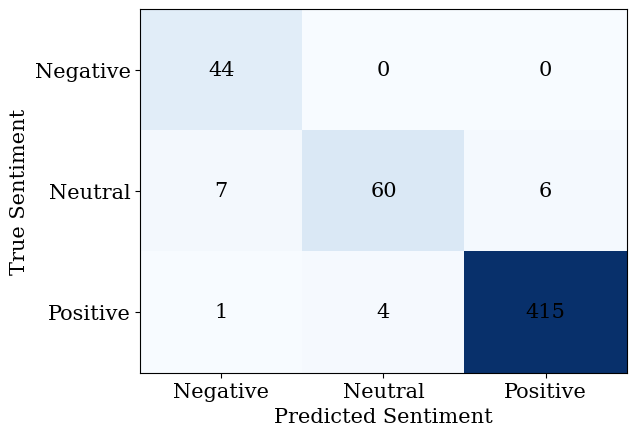

In [11]:
labels = ["Negative", "Neutral", "Positive"]
y_true, y_pred = [], []

for _, row in df_cleaned.iterrows():
    # parse Predicted Triplets
    pred_str = row["Predicted Triplets"]
    try:
        preds = ast.literal_eval(pred_str) if isinstance(pred_str, str) else []
    except (ValueError, SyntaxError):
        preds = []
    # parse True Triplets
    true_list = row["True Triplets"]
    if not isinstance(true_list, list):
        try:
            true_list = ast.literal_eval(true_list)
        except:
            true_list = []

    # loop tiap triplet ground-truth
    for tt in true_list:
        match = next(
            (p for p in preds
             if p.get("Aspect")==tt.get("Aspect")
             and p.get("Opinion")==tt.get("Opinion")),
            None
        )
        if match:
            y_true.append(tt.get("Polarity"))
            y_pred.append(match.get("Polarity"))

# Compute confusion matrix & classification report
cm = confusion_matrix(y_true, y_pred, labels=labels)
print("Classification Report (Aspect+Opinion matches only):\n")
print(classification_report(y_true, y_pred, labels=labels, zero_division=0))

# Plot confusion matrix dengan size lebih lebar
fig, ax = plt.subplots(figsize=(7, 5))         # buat lebih lebar
im = ax.imshow(cm, cmap="Blues", aspect="auto") 

# beri anotasi angka
for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, cm[i,j],
                ha="center", va="center", color="black")

# set ticks & label
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=0)         # horizontal label
ax.set_yticklabels(labels)
ax.set_xlabel("Predicted Sentiment")
ax.set_ylabel("True Sentiment")
# plt.title("Confusion Matrix After Improvement")

# tambahkan sedikit padding di bawah agar label tidak nge-crop
plt.tight_layout(pad=2.0)
plt.show()

## ⭐️ Analisis Kesalahan Prediksi

In [66]:
# Fungsi untuk mengonversi list of dict triplet menjadi set of tuple
def parse_triplets(triplet_str):
    try:
        triplet_list = ast.literal_eval(triplet_str) if isinstance(triplet_str, str) else []
    except:
        return set()
    result = set()
    for t in triplet_list:
        try:
            aspect = t.get('Aspect', '').strip()
            opinion = t.get('Opinion', '').strip()
            polarity = t.get('Polarity', '').strip()
            result.add((aspect, opinion, polarity))
        except:
            continue
    return result

In [67]:
# Menentukan subkategori untuk kasus Error Jumlah Sama
def subcategory_equal_count(pred_set, gold_set):
    pred_list = list(pred_set)
    gold_list = list(gold_set)
    
    # Cek setiap pred dalam gold untuk menentukan jenis kesalahan
    for p in pred_list:
        for g in gold_list:
            # Cek kesamaan elemen
            same_aspect = (p[0] == g[0])
            same_opinion = (p[1] == g[1])
            same_sentiment = (p[2] == g[2])
            
            if same_aspect and same_opinion and not same_sentiment:
                return "Sentimen"
            if same_aspect and not same_opinion and same_sentiment:
                return "Opini"
            if not same_aspect and same_opinion and same_sentiment:
                return "Aspek"
            if same_aspect and not same_opinion and not same_sentiment:
                return "Opini-Sentimen"
            if not same_aspect and same_opinion and not same_sentiment:
                return "Aspek-Sentimen"
            # if not same_aspect and not same_opinion and same_sentiment:
            #    return "Aspek-Opini"
    
    # Jika tidak ada kesamaan di single element maupun double element
    return "Triplet"

# Fungsi utama untuk menentukan kategori dan subkategori
def categorize(pred_set, gold_set):
    # 1. Semuanya Tepat
    if pred_set == gold_set:
        return "Semuanya Tepat", ""
    
    # 2. Tidak Terprediksi
    if not pred_set and gold_set:
        return "Tidak Terprediksi", ""
    
    # 3. Error Jumlah Sama
    if len(pred_set) == len(gold_set) and pred_set != gold_set:
        sub = subcategory_equal_count(pred_set, gold_set)
        return "Error Jumlah Sama", sub
    
    # 4. Error Jumlah Berbeda (Ada Overlap)
    intersection = pred_set.intersection(gold_set)
    if len(pred_set) != len(gold_set) and intersection:
        if len(pred_set) > len(gold_set):
            return "Error Jumlah Berbeda", "Berlebih Tetapi Ada yang Benar"
        else:
            return "Error Jumlah Berbeda", "Kurang Tetapi Ada yang Benar"
    
    # 5. Tidak Ada Irisan
    if not intersection and pred_set and gold_set:
        return "Tidak Ada Irisan", ""
    
    # 6. False Positive (pred ada, gold kosong)
    # if pred_set and not gold_set:
    #    return "False Positive", ""
    
    # 7. Tidak Terkategorikan (kasus parsing error atau format aneh)
    # return "Tidak Terkategorikan", ""

In [68]:
# Baca file Excel
input_file = 'hasil_triplet_setelah_improvement.xlsx'
df = pd.read_excel(input_file)

# Buat kolom baru untuk kategori dan subkategori
categories = []
subcategories = []

for idx, row in df.iterrows():
    pred_set = parse_triplets(row['Predicted Triplets'])
    gold_set = parse_triplets(row['True Triplets'])
    category, subcat = categorize(pred_set, gold_set)
    categories.append(category)
    subcategories.append(subcat)

df['Category'] = categories
df['Subcategory'] = subcategories


In [69]:
# Hitung jumlah per kombinasi Category + Subcategory
counts_df = (
    df
    .groupby(['Category', 'Subcategory'])
    .size()
    .reset_index(name='Count')
    .sort_values(['Category', 'Subcategory'])
)

# Total keseluruhan (untuk menghitung persentase detail)
total_all = len(df)

# Tambahkan kolom Percent (berdasarkan Count / total_all * 100)
counts_df['Percent_Detail'] = counts_df['Count'] / total_all * 100

counts_df['Percent_Detail'] = counts_df['Percent_Detail'].map(lambda x: f"{x:.2f}%")

print(counts_df)

               Category                     Subcategory  Count Percent_Detail
0  Error Jumlah Berbeda  Berlebih Tetapi Ada yang Benar     40         10.67%
1  Error Jumlah Berbeda    Kurang Tetapi Ada yang Benar     69         18.40%
2     Error Jumlah Sama                           Aspek     17          4.53%
3     Error Jumlah Sama                           Opini     37          9.87%
4     Error Jumlah Sama                  Opini-Sentimen      5          1.33%
5     Error Jumlah Sama                        Sentimen      9          2.40%
6     Error Jumlah Sama                         Triplet     11          2.93%
7        Semuanya Tepat                                    147         39.20%
8      Tidak Ada Irisan                                     24          6.40%
9     Tidak Terprediksi                                     16          4.27%


In [76]:
# total sampel
total = len(df)
# jumlah yang benar sama persis
n_correct = (df["Category"] == "Semuanya Tepat").sum()
# akurasi dalam persen
accuracy = n_correct / total * 100
print(f"Akurasi (exact‐match): {accuracy:.2f}%")


Akurasi (exact‐match): 39.20%


In [70]:
# Hitung jumlah per Category (tanpa Subcategory)
category_counts = (
    df
    .groupby('Category')
    .size()
    .reset_index(name='Count_Category')
    .sort_values('Category')
)

# Hitung persentase per Category
category_counts['Percent_Category'] = category_counts['Count_Category'] / len(df) * 100

category_counts['Percent_Category'] = category_counts['Percent_Category'].map(lambda x: f"{x:.2f}%")

print(category_counts)

               Category  Count_Category Percent_Category
0  Error Jumlah Berbeda             109           29.07%
1     Error Jumlah Sama              79           21.07%
2        Semuanya Tepat             147           39.20%
3      Tidak Ada Irisan              24            6.40%
4     Tidak Terprediksi              16            4.27%


In [72]:
# Export hasil ke Excel baru
output_file = 'hasil_analisis_triplet_setelah_improvement_newest.xlsx'
df.to_excel(output_file, index=False)

output_file

'hasil_analisis_triplet_setelah_improvement_newest.xlsx'

## ⭐️ Partial Match

In [73]:
import ast

def parse_triplets(triplet_str):
    """Ubah JSON‐string menjadi set of tuple (aspect,opinion,polarity)."""
    try:
        lst = ast.literal_eval(triplet_str) if isinstance(triplet_str, str) else []
    except:
        lst = []
    return {
        (t.get("Aspect","").strip(), t.get("Opinion","").strip(), t.get("Polarity","").strip())
        for t in lst
        if all(k in t for k in ("Aspect","Opinion","Polarity"))
    }

def is_partial(p, g):
    """
    Partial match = ada overlap kata di aspect *dan* di opinion,
    plus sentiment harus sama.
    """
    asp_p, op_p, pol_p = p
    asp_g, op_g, pol_g = g
    if pol_p != pol_g:
        return False
    set_asp_p = set(asp_p.split())
    set_asp_g = set(asp_g.split())
    set_op_p  = set(op_p.split())
    set_op_g  = set(op_g.split())
    return bool(set_asp_p & set_asp_g) and bool(set_op_p & set_op_g)

def compute_detailed(pred_str, gold_str):
    """
    Mengembalikan (n_exact, n_partial, n_wrong, n_predicted, n_actual)
    """
    pred = parse_triplets(pred_str)
    gold = parse_triplets(gold_str)
    
    exact = pred & gold
    remaining_preds = pred - exact
    remaining_golds = gold - exact
    
    partial = set()
    # cari untuk tiap pred yang tidak exact
    for p in remaining_preds:
        # jika ketemu gold yang partial match, hitung sekali
        for g in remaining_golds:
            if is_partial(p, g):
                partial.add(p)
                break
    
    wrong = remaining_preds - partial
    
    return (
        len(exact),
        len(partial),
        len(wrong),
        len(pred),
        len(gold)
    )

In [74]:
# Terapkan ke dataframe
df[[
    "Exact","Partial","Wrong","Pred_Count","Gold_Count"
]] = df.apply(
    lambda r: pd.Series(compute_detailed(
        r["Predicted Triplets"],
        r["True Triplets"]
    )),
    axis=1
)

# Contoh: total overall dataset
total_exact   = df["Exact"].sum()
total_partial = df["Partial"].sum()
total_wrong   = df["Wrong"].sum()
total_pred    = df["Pred_Count"].sum()
total_gold    = df["Gold_Count"].sum()

print(f"Predicted: {total_pred}, Actual: {total_gold}")
print(f"Exact matches: {total_exact}")
print(f"Partial matches: {total_partial}")
print(f"Wrong predictions: {total_wrong}")
print(f"Overall accuracy (exact+partial)/actual: {(total_exact+total_partial)/total_gold:.2%}")

Predicted: 780, Actual: 852
Exact matches: 519
Partial matches: 104
Wrong predictions: 157
Overall accuracy (exact+partial)/actual: 73.12%


In [75]:
# Export hasil ke Excel baru
output_file = 'hasil_analisis_triplet_setelah_improvement_partial_match.xlsx'
df.to_excel(output_file, index=False)

output_file

'hasil_analisis_triplet_setelah_improvement_partial_match.xlsx'

In [84]:
import pandas as pd

# 1. Baca DataFrame analisis detail
df = pd.read_excel('hasil_analisis_triplet_setelah_improvement_partial_match.xlsx')

# 1a. Pastikan Subcategory NaN jadi ""
df['Subcategory'] = df['Subcategory'].fillna('')

# 2. Fungsi ringkasan per grup
def summarize_group(df_grp, cat, subcat):
    title = cat if not subcat else f"{cat} → {subcat}"
    print("\n" + "="*len(title))
    print(title)
    print("="*len(title))

    # Review‐level
    total_reviews      = len(df_grp)
    reviews_partial    = (df_grp['Partial'] > 0).sum()
    reviews_no_partial = total_reviews - reviews_partial
    print(f"Total ulasan           : {total_reviews}")
    print(f"  ↳ dengan partial      : {reviews_partial} "
          f"({reviews_partial/total_reviews*100:.2f}%)")
    print(f"  ↳ tanpa partial       : {reviews_no_partial} "
          f"({reviews_no_partial/total_reviews*100:.2f}%)")

    # Triplet‐level
    tp = df_grp['Pred_Count'].sum()
    tg = df_grp['Gold_Count'].sum()
    ex = df_grp['Exact'].sum()
    pa = df_grp['Partial'].sum()
    wr = df_grp['Wrong'].sum()

    print(f"\nTotal prediksi triplet      : {tp}")
    print(f"Total ground‐truth triplet  : {tg}")
    print(f"  ↳ Exact       : {ex} ({ex/tg*100:.2f}% of GT)")
    print(f"  ↳ Partial     : {pa} ({pa/tg*100:.2f}% of GT)")
    print(f"  ↳ Wrong       : {wr} ({wr/tg*100:.2f}% of GT)")
    print(f"  ↳ Exact+Partial: {ex+pa} ({(ex+pa)/tg*100:.2f}% of GT)")

    # Contoh ulasan
    if reviews_partial:
        print("\nContoh ulasan dengan partial match:")
        for sent in df_grp[df_grp['Partial'] > 0]['Sentence'].head(3):
            print(" -", sent)
    if reviews_no_partial:
        print("\nContoh ulasan tanpa partial match:")
        for sent in df_grp[df_grp['Partial'] == 0]['Sentence'].head(3):
            print(" -", sent)

# 3. Iterasi ke semua kombinasi Category + Subcategory
for (cat, subcat), grp in df.groupby(['Category','Subcategory']):
    summarize_group(grp, cat, subcat)



Error Jumlah Berbeda → Berlebih Tetapi Ada yang Benar
Total ulasan           : 40
  ↳ dengan partial      : 12 (30.00%)
  ↳ tanpa partial       : 28 (70.00%)

Total prediksi triplet      : 139
Total ground‐truth triplet  : 93
  ↳ Exact       : 65 (69.89% of GT)
  ↳ Partial     : 15 (16.13% of GT)
  ↳ Wrong       : 59 (63.44% of GT)
  ↳ Exact+Partial: 80 (86.02% of GT)

Contoh ulasan dengan partial match:
 - trus banyak yang ngasih2 makan ikannya pakai pelet , jadi kotor pinggir kolamnya . kedalaman mungkin bisa dibuat agak dangkal misal 1 meter saja gitu biar lebih aman buat anak - anak yang tidak bisa renang bisa ikutan main ke tengah , kaya umbul manten gitu lho . tempat duduk di pinggir kolam banyak , yang jualan makanan juga banyak .
 - pengalaman menyelam dengan ikan - ikan . seru . adem . makanan juga murah dan enak . harga tiket masuk terjangkau . tempat duduk banyak padahal hari libur
 - tempat yang rekomendasi untuk para wisatan karena banyak tempat yang bisa dikunjungi , ban

In [85]:
# Export hasil ke Excel baru
output_file = 'hasil_analisis_detailed_exact_partial_match.xlsx'
df.to_excel(output_file, index=False)

output_file

'hasil_analisis_detailed_exact_partial_match.xlsx'

### Checkpoints

In [1]:
from pyabsa import AspectSentimentTripletExtraction as ASTE
from pyabsa import ModelSaveOption, DeviceTypeOption

/home/riset/.local/lib/python3.10/site-packages/spacy/cli/_util.py:23: DeprecationWarning: Importing 'parser.split_arg_string' is deprecated, it will only be available in 'shell_completion' in Click 9.0.
  from click.parser import split_arg_string
/home/riset/.local/lib/python3.10/site-packages/weasel/util/config.py:8: DeprecationWarning: Importing 'parser.split_arg_string' is deprecated, it will only be available in 'shell_completion' in Click 9.0.
  from click.parser import split_arg_string


[2025-06-06 14:09:14] (2.4.1.post1) PyABSA(2.4.1.post1): If your code crashes on Colab, please use the GPU runtime. Then run "pip install pyabsa[dev] -U" and restart the kernel.
Or if it does not work, you can use v1.x versions, e.g., pip install pyabsa<2.0 -U




Try to downgrade transformers<=4.29.0.






/drive0-storage/TA_Ista/Coba/PyABSA/pyabsa/framework/checkpoint_class/checkpoint_utils.py:11: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  from distutils.version import StrictVersion
2025-06-06 14:09:14.608549: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-06 14:09:15.377746: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3.10/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=1>
  _warn(f"unclosed running multiprocessing pool {self!r}",


In [2]:
from pyabsa import available_checkpoints

ckpts = available_checkpoints(
    show_ckpts=True
)

[2025-06-06 14:10:17] (2.4.1.post1) Please specify the task code, e.g. from pyabsa import TaskCodeOption


In [3]:
triplet_extractor = ASTE.AspectSentimentTripletExtractor(
    checkpoint="AfterImprovement_f1_67.61_best"
)  

[2025-06-06 14:10:23] (2.4.1.post1) ********** Available ASTE model checkpoints for Version:2.4.1.post1 (this version) **********
[2025-06-06 14:10:23] (2.4.1.post1) ********** Available ASTE model checkpoints for Version:2.4.1.post1 (this version) **********
[2025-06-06 14:10:23] (2.4.1.post1) Checkpoint:AfterImprovement_f1_67.61_best is not found, you can raise an issue for requesting shares of checkpoints
[2025-06-06 14:10:23] (2.4.1.post1) No checkpoint found in Model Hub for task: AfterImprovement_f1_67.61_best
[2025-06-06 14:10:23] (2.4.1.post1) Load sentiment classifier from checkpoints/AfterImprovement_f1_67.61_best
[2025-06-06 14:10:23] (2.4.1.post1) config: checkpoints/AfterImprovement_f1_67.61_best/emcgcn.config
[2025-06-06 14:10:23] (2.4.1.post1) state_dict: checkpoints/AfterImprovement_f1_67.61_best/emcgcn.state_dict
[2025-06-06 14:10:23] (2.4.1.post1) model: None
[2025-06-06 14:10:23] (2.4.1.post1) tokenizer: checkpoints/AfterImprovement_f1_67.61_best/emcgcn.tokenizer
[20

/home/riset/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [4]:
# # Predict
examples = [
    "tempatnya bersih , asri , sejuk , warga lokal ramah - ramah , suka suasananya .####[([0], [1, 2, 3, 4, 5], 'POS'), ([7, 8], [9, 10, 11], 'POS'), ([14], [13], 'POS')]",
    "Desa ini sangat bersih",
    "Pada saat saya kesini, warganya sangat ramah",
    "Desa Kampung Blekok sangat kotor",
    "Desa Penglipuran merupakan desa terbersih di Indonesia",
    "wisata di kota malang",
    "pujon kidul adalah sebuah desa di wilayah kecamatan pujon , kabupaten malang , provinsi jawa timur . desa ini merupakan desa terbesar di indonesia . pujon ."
]
for example in examples:
    triplet_extractor.predict(example)

[2025-06-06 14:10:42] (2.4.1.post1) Batch: 0 {'sentence_id': 0, 'sentence': 'tempatnya bersih , asri , sejuk , warga lokal ramah - ramah , suka suasananya .', 'Triplets': [{'Aspect': 'tempatnya', 'Opinion': 'bersih', 'Polarity': 'Positive'}, {'Aspect': 'tempatnya', 'Opinion': 'asri', 'Polarity': 'Positive'}, {'Aspect': 'warga lokal', 'Opinion': 'sejuk', 'Polarity': 'Positive'}, {'Aspect': 'warga lokal', 'Opinion': 'ramah - ramah', 'Polarity': 'Positive'}, {'Aspect': 'suasananya', 'Opinion': 'suka', 'Polarity': 'Positive'}], 'True Triplets': [{'Aspect': 'tempatnya', 'Opinion': 'bersih , asri , sejuk', 'Polarity': 'Positive'}, {'Aspect': 'warga lokal', 'Opinion': 'ramah - ramah', 'Polarity': 'Positive'}, {'Aspect': 'suasananya', 'Opinion': 'suka', 'Polarity': 'Positive'}]}
[2025-06-06 14:10:42] (2.4.1.post1) Batch: 0 {'sentence_id': 0, 'sentence': 'tempatnya bersih , asri , sejuk , warga lokal ramah - ramah , suka suasananya .', 'Triplets': [{'Aspect': 'tempatnya', 'Opinion': 'bersih', '

In [15]:
# # Predict
examples = [
    "air dingin",
    "tempat ramai",
    "airnya dingin",
    "air ini dingin",
    "airr dingin",
    "aiiir dingin",
    "ddesa pujongkidul bagus"
]
for example in examples:
    triplet_extractor.predict(example)

[2025-06-06 14:16:59] (2.4.1.post1) Batch: 0 {'sentence_id': 0, 'sentence': 'air dingin', 'Triplets': [{'Aspect': 'air', 'Opinion': 'dingin', 'Polarity': 'Negative'}], 'True Triplets': []}
[2025-06-06 14:16:59] (2.4.1.post1) Batch: 0 {'sentence_id': 0, 'sentence': 'air dingin', 'Triplets': [{'Aspect': 'air', 'Opinion': 'dingin', 'Polarity': 'Negative'}], 'True Triplets': []}
[2025-06-06 14:16:59] (2.4.1.post1) Batch: 0 {'sentence_id': 0, 'sentence': 'tempat ramai', 'Triplets': [{'Aspect': 'tempat', 'Opinion': 'ramai', 'Polarity': 'Negative'}], 'True Triplets': []}
[2025-06-06 14:16:59] (2.4.1.post1) Batch: 0 {'sentence_id': 0, 'sentence': 'tempat ramai', 'Triplets': [{'Aspect': 'tempat', 'Opinion': 'ramai', 'Polarity': 'Negative'}], 'True Triplets': []}
[2025-06-06 14:16:59] (2.4.1.post1) Batch: 0 {'sentence_id': 0, 'sentence': 'airnya dingin', 'Triplets': [{'Aspect': 'airnya', 'Opinion': 'dingin', 'Polarity': 'Positive'}], 'True Triplets': []}
[2025-06-06 14:16:59] (2.4.1.post1) Batch

In [7]:
# # Predict
examples = [
    "air dingin bikin gak betah berenang",
    "tempat ramai jadi tidak bisa foto"
]
for example in examples:
    triplet_extractor.predict(example)

[2025-06-06 14:12:20] (2.4.1.post1) Batch: 0 {'sentence_id': 0, 'sentence': 'air dingin bikin gak betah berenang', 'Triplets': [{'Aspect': 'air', 'Opinion': 'dingin', 'Polarity': 'Negative'}], 'True Triplets': []}
[2025-06-06 14:12:20] (2.4.1.post1) Batch: 0 {'sentence_id': 0, 'sentence': 'air dingin bikin gak betah berenang', 'Triplets': [{'Aspect': 'air', 'Opinion': 'dingin', 'Polarity': 'Negative'}], 'True Triplets': []}
[2025-06-06 14:12:20] (2.4.1.post1) Batch: 0 {'sentence_id': 0, 'sentence': 'tempat ramai jadi tidak bisa foto', 'Triplets': [{'Aspect': 'tempat', 'Opinion': 'ramai', 'Polarity': 'Negative'}, {'Aspect': 'tempat', 'Opinion': 'tidak bisa foto', 'Polarity': 'Negative'}], 'True Triplets': []}
[2025-06-06 14:12:20] (2.4.1.post1) Batch: 0 {'sentence_id': 0, 'sentence': 'tempat ramai jadi tidak bisa foto', 'Triplets': [{'Aspect': 'tempat', 'Opinion': 'ramai', 'Polarity': 'Negative'}, {'Aspect': 'tempat', 'Opinion': 'tidak bisa foto', 'Polarity': 'Negative'}], 'True Triplet

In [8]:
# # Predict
examples = [
    "di kete kesu ada rumah adat tradisionalnya, yaitu tongkonan",
    "terdapat makam yang terletak di belakang tongkonan"
]
for example in examples:
    triplet_extractor.predict(example)

[2025-06-06 14:12:30] (2.4.1.post1) Batch: 0 {'sentence_id': 0, 'sentence': 'di kete kesu ada rumah adat tradisionalnya, yaitu tongkonan', 'Triplets': [{'Aspect': 'rumah adat tradisionalnya,', 'Opinion': 'ada', 'Polarity': 'Neutral'}], 'True Triplets': []}
[2025-06-06 14:12:30] (2.4.1.post1) Batch: 0 {'sentence_id': 0, 'sentence': 'di kete kesu ada rumah adat tradisionalnya, yaitu tongkonan', 'Triplets': [{'Aspect': 'rumah adat tradisionalnya,', 'Opinion': 'ada', 'Polarity': 'Neutral'}], 'True Triplets': []}
[2025-06-06 14:12:31] (2.4.1.post1) Batch: 0 {'sentence_id': 0, 'sentence': 'terdapat makam yang terletak di belakang tongkonan', 'Triplets': [{'Aspect': 'makam', 'Opinion': 'terletak di belakang tongkonan', 'Polarity': 'Neutral'}], 'True Triplets': []}
[2025-06-06 14:12:31] (2.4.1.post1) Batch: 0 {'sentence_id': 0, 'sentence': 'terdapat makam yang terletak di belakang tongkonan', 'Triplets': [{'Aspect': 'makam', 'Opinion': 'terletak di belakang tongkonan', 'Polarity': 'Neutral'}],

## ⭐️ Eksplorasi Model terhadap Kompleksitas Data

In [87]:
df_cleaned

,Sentence,Predicted Triplets,True Triplets,Count Predicted Triplets,Count True Triplets
0,kampung dengan ciri khas tersendiri bikin beta...,"[{'Aspect': 'kampung', 'Opinion': 'ciri khas t...","[{'Aspect': 'kampung', 'Opinion': 'ciri khas t...",1,1
1,"bagus , sayangnya ada bangunan modern dibangun...",[],"[{'Aspect': 'bangunan modern', 'Opinion': 'mer...",0,1
2,"untuk harga tiket masuk rp . 10 . 000 , 00","[{'Aspect': 'harga tiket masuk', 'Opinion': 'r...","[{'Aspect': 'harga tiket masuk', 'Opinion': 'r...",1,1
3,saya ambil paket foto di dalam air menggunakan...,"[{'Aspect': 'karyawan', 'Opinion': 'sangat bai...","[{'Aspect': 'karyawan', 'Opinion': 'sangat bai...",1,1
4,kemudian dinding kolam seperti tidak diberikan...,"[{'Aspect': 'dinding kolam', 'Opinion': 'seper...","[{'Aspect': 'dinding kolam', 'Opinion': 'tidak...",4,3
...,...,...,...,...,...
372,"namun ditahun 2021 bulan juni , banyak yang su...","[{'Aspect': 'jalannya', 'Opinion': 'tidak bisa...","[{'Aspect': 'cafe', 'Opinion': 'sudah pada tut...",1,3
373,semakin ada perkembangan,"[{'Aspect': 'perkembangan', 'Opinion': 'semaki...","[{'Aspect': 'perkembangan', 'Opinion': 'semaki...",1,1
374,tempatnya tidak jauh dari kota . tiket masuk 1...,"[{'Aspect': 'tempatnya', 'Opinion': 'tidak jau...","[{'Aspect': 'tempatnya', 'Opinion': 'tidak jau...",3,4
375,"tempatnya bagus bersih , lebih mengesankan kal...","[{'Aspect': 'tempatnya', 'Opinion': 'bagus', '...","[{'Aspect': 'tempatnya', 'Opinion': 'bagus', '...",2,3


#### Panjang Kalimat 💗ྀི

In [18]:
# Tambahkan kolom “Word_Count” (jumlah kata per “Text”)
df_cleaned["Word_Count"] = df_cleaned["Sentence"].apply(lambda t: len(str(t).split()))

In [19]:
# Definisikan fungsi hitung TP, FP, FN untuk tiap baris
def compute_row_metrics(true_list, pred_list):
    """
    Menghitung TP, FP, FN dalam satu baris:
    - true_list: list of dict ground truth
    - pred_list: list of dict prediksi
    Matching dianggap exact match (Aspect, Opinion, Polarity).
    """
    # Jika masih string (karena mungkin tersimpan sbg JSON string), parse dulu:
    if isinstance(true_list, str):
        try:
            true_list = ast.literal_eval(true_list)
        except (ValueError, SyntaxError):
            true_list = []
    if isinstance(pred_list, str):
        try:
            pred_list = ast.literal_eval(pred_list)
        except (ValueError, SyntaxError):
            pred_list = []

    # Pastikan kita punya list of dict, jika tidak: jadikan list kosong
    true_list = true_list if isinstance(true_list, list) else []
    pred_list = pred_list if isinstance(pred_list, list) else []

    # Bentuk “set” tuple untuk exact matching A,O,Polarity
    gold_set = set(
        (t.get("Aspect"), t.get("Opinion"), t.get("Polarity"))
        for t in true_list
        if all(k in t for k in ("Aspect", "Opinion", "Polarity"))
    )
    pred_set = set(
        (p.get("Aspect"), p.get("Opinion"), p.get("Polarity"))
        for p in pred_list
        if all(k in p for k in ("Aspect", "Opinion", "Polarity"))
    )

    tp = len(gold_set & pred_set)
    fp = len(pred_set - gold_set)
    fn = len(gold_set - pred_set)

    return tp, fp, fn


In [20]:
# Terapkan fungsi compute_row_metrics untuk setiap baris dan simpan ke kolom “TP/FP/FN”
metrics = df_cleaned.apply(
    lambda r: compute_row_metrics(r["True Triplets"], r["Predicted Triplets"]),
    axis=1
)
df_cleaned[["TP", "FP", "FN"]] = pd.DataFrame(metrics.tolist(), index=df_cleaned.index)


In [21]:
df_cleaned

,Sentence,Predicted Triplets,True Triplets,Count Predicted Triplets,Count True Triplets,Word_Count,TP,FP,FN
0,kampung dengan ciri khas tersendiri bikin beta...,"[{'Aspect': 'kampung', 'Opinion': 'ciri khas t...","[{'Aspect': 'kampung', 'Opinion': 'ciri khas t...",1,1,9,1,0,0
1,"bagus , sayangnya ada bangunan modern dibangun...",[],"[{'Aspect': 'bangunan modern', 'Opinion': 'mer...",0,1,15,0,0,1
2,"untuk harga tiket masuk rp . 10 . 000 , 00","[{'Aspect': 'harga tiket masuk', 'Opinion': 'r...","[{'Aspect': 'harga tiket masuk', 'Opinion': 'r...",1,1,11,1,0,0
3,saya ambil paket foto di dalam air menggunakan...,"[{'Aspect': 'karyawan', 'Opinion': 'sangat bai...","[{'Aspect': 'karyawan', 'Opinion': 'sangat bai...",1,1,55,1,0,0
4,kemudian dinding kolam seperti tidak diberikan...,"[{'Aspect': 'dinding kolam', 'Opinion': 'seper...","[{'Aspect': 'dinding kolam', 'Opinion': 'tidak...",4,3,66,3,1,0
...,...,...,...,...,...,...,...,...,...
370,"namun ditahun 2021 bulan juni , banyak yang su...","[{'Aspect': 'jalannya', 'Opinion': 'tidak bisa...","[{'Aspect': 'cafe', 'Opinion': 'sudah pada tut...",1,3,58,0,1,3
371,semakin ada perkembangan,"[{'Aspect': 'perkembangan', 'Opinion': 'semaki...","[{'Aspect': 'perkembangan', 'Opinion': 'semaki...",1,1,3,0,1,1
372,tempatnya tidak jauh dari kota . tiket masuk 1...,"[{'Aspect': 'tempatnya', 'Opinion': 'tidak jau...","[{'Aspect': 'tempatnya', 'Opinion': 'tidak jau...",3,4,59,3,0,1
373,"tempatnya bagus bersih , lebih mengesankan kal...","[{'Aspect': 'tempatnya', 'Opinion': 'bagus', '...","[{'Aspect': 'tempatnya', 'Opinion': 'bagus', '...",2,3,15,2,0,1


In [22]:
# Hitung skor Precision, Recall, dan F1 per baris
df_cleaned["Precision"] = df_cleaned.apply(
    lambda r: r["TP"] / (r["TP"] + r["FP"]) if (r["TP"] + r["FP"]) > 0 else 0,
    axis=1
)
df_cleaned["Recall"] = df_cleaned.apply(
    lambda r: r["TP"] / (r["TP"] + r["FN"]) if (r["TP"] + r["FN"]) > 0 else 0,
    axis=1
)
df_cleaned["F1"] = df_cleaned.apply(
    lambda r: 2 * r["Precision"] * r["Recall"] / (r["Precision"] + r["Recall"])
    if (r["Precision"] + r["Recall"]) > 0 else 0,
    axis=1
)


In [23]:
# Bagi ke dalam Length_Bin: 0–25, 25–50, 50–75, 75–100
bins  = [0, 25, 50, 75]
labels = ["0-25","25-50","50-75"]
df_cleaned["Length_Bin"] = pd.cut(
    df_cleaned["Word_Count"],
    bins=bins,
    labels=labels,
    right=False   # tiap bin mencakup start ≤ x < end
)

/tmp/ipykernel_9672/3174713536.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Length_Bin")


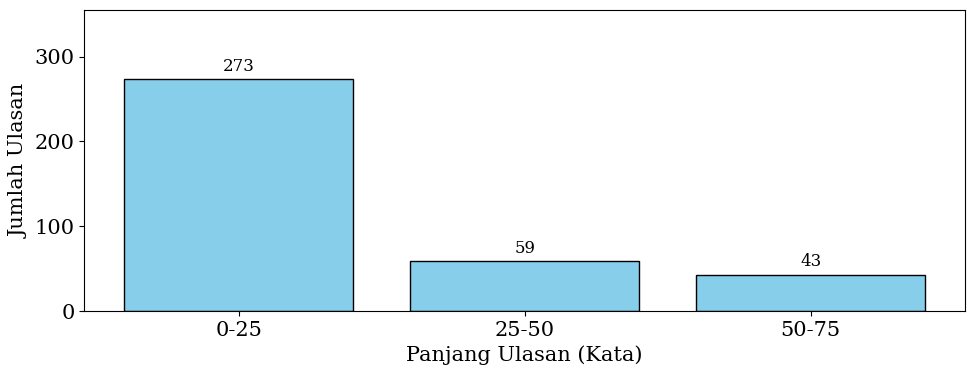

In [57]:
# 4. Hitung jumlah ulasan per bin
count_per_bin = (
    df_cleaned
    .groupby("Length_Bin")
    .size()
    .reindex(labels, fill_value=0)
    .reset_index(name="Count")
)

# 5. Plot
plt.figure(figsize=(10,4))
bars = plt.bar(
    count_per_bin["Length_Bin"].astype(str),
    count_per_bin["Count"],
    color="skyblue",
    edgecolor="black"
)
plt.xlabel("Panjang Ulasan (Kata)")
plt.ylabel("Jumlah Ulasan")
# plt.title("Jumlah Ulasan per Rentang Panjang (Kata)")

# offset 2% dari max
offset = count_per_bin["Count"].max() * 0.02 

for bar in bars:
    h = bar.get_height()
    if h>0:
        plt.text(
            bar.get_x()+bar.get_width()/2,
            # h + count_per_bin["Count"].max()*0.005,
            h + 5,            # ← offset lebih besar
            f"{int(h)}",
            # f"{h}",
            ha="center", va="bottom", fontsize=12
        )
        
max_count = count_per_bin["Count"].max()
plt.ylim(0, max_count * 1.3)   # 30% extra space di atas
plt.tight_layout()
plt.savefig('jumlah_kata_per_ulasan.png', dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipykernel_9672/1403404775.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("Length_Bin")


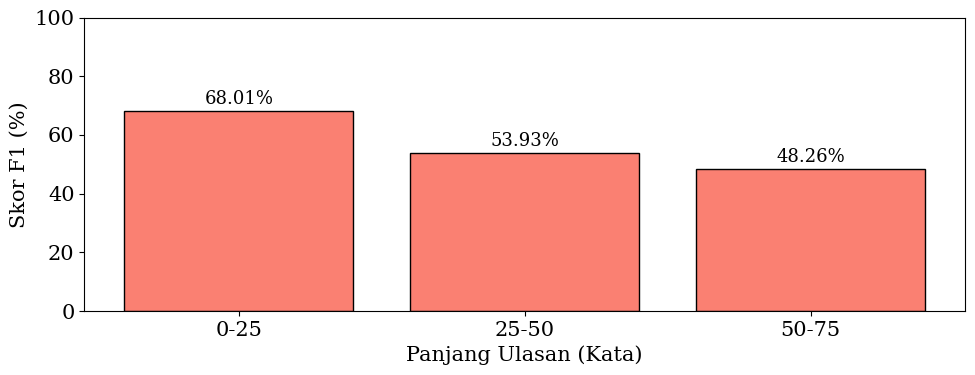

In [65]:
# 9. (B) HITUNG RATA‐RATA F1 PER BIN
grouped = (
    df_cleaned
    .groupby("Length_Bin")
    .agg({"F1": "mean"})
    .reindex(labels)       # agar urut persis sesuai labels
    .reset_index()
)
# Konversi ke persen (0–100)
grouped["F1_pct"] = grouped["F1"] * 100

# 10. Plot Grafik Batang: “Skor F1 per Rentang Panjang (Kata)”
plt.figure(figsize=(10, 4))
bars2 = plt.bar(
    grouped["Length_Bin"].astype(str),
    grouped["F1_pct"],
    color="salmon",
    edgecolor="black"
)
plt.ylim(0, 100)
plt.xlabel("Panjang Ulasan (Kata)")
plt.ylabel("Skor F1 (%)")
# plt.title("Skor F1 Berdasarkan Panjang Ulasan")
# plt.xticks(rotation=45)

# Tambahkan label skor di atas tiap batang
for bar in bars2:
    h = bar.get_height()
    if not np.isnan(h):
        plt.text(
            bar.get_x() + bar.get_width()/2,
            h + 1.0,
            f"{h:.2f}%",
            ha="center",
            va="bottom",
            fontsize=13
        )

plt.tight_layout()
plt.savefig('akurasi_jumlah_kata_per_ulasan.png', dpi=300, bbox_inches='tight')
plt.show()

#### skip

In [53]:
import pandas as pd

# Nama bin yang ingin ditampilkan
bin_label = "75-125"

# Filter df_cleaned untuk hanya baris di bin "75-125"
filtered_df = df_cleaned[df_cleaned["Length_Bin"] == bin_label].copy()

# Pilih kolom-kolom yang ingin diperlihatkan
display_df = filtered_df[["Sentence", "True Triplets", "Predicted Triplets"]].copy()

# Ubah nama kolom agar lebih mudah dibaca
display_df = display_df.rename(columns={
    "Sentence": "Ulasan",
    "True Triplets": "Triplet Benar (True)",
    "Predicted Triplets": "Triplet Prediksi (Predicted)"
})

# Tampilkan DataFrame
from IPython.display import display
print("\n=== Perbandingan Triplet di Bin 75–125 Kata ===\n")
display(display_df)


=== Perbandingan Triplet di Bin 75–125 Kata ===



,Ulasan,Triplet Benar (True),Triplet Prediksi (Predicted)
16,harga tiket masuk @15k foto underwater propert...,"[{'Aspect': 'harga tiket masuk', 'Opinion': '@...","[{'Aspect': 'penjaga kebersihan', 'Opinion': '..."
99,desa wisata ini merupakan tempat wisata dengan...,"[{'Aspect': 'tempat wisata', 'Opinion': 'keuni...",[]


#### Jumlah Triplet 💗ྀི

In [28]:
# Hitung jumlah triplet ground-truth per ulasan
df_cleaned["Triplet_Count"] = df_cleaned["True Triplets"].apply(lambda lst: len(lst))

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Hitung jumlah ulasan di tiap Triplet_Count
count_per_triplet = (
    df_cleaned
    .groupby("Triplet_Count")
    .size()
    .reset_index(name="Count")
)
# Pastikan diurutkan berdasarkan Triplet_Count (0,1,2,3,...)
count_per_triplet = count_per_triplet.sort_values("Triplet_Count").reset_index(drop=True)


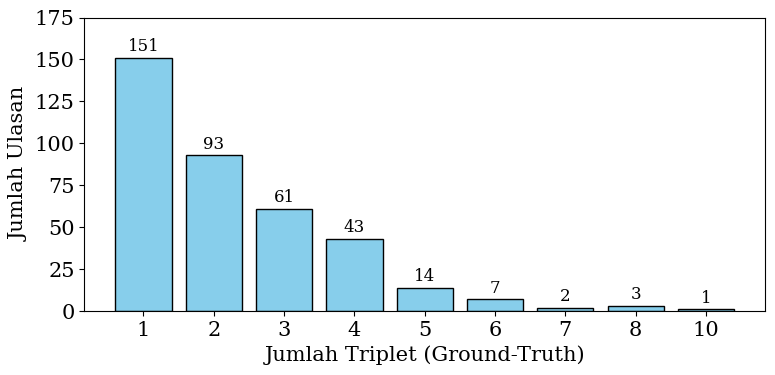

In [59]:
plt.figure(figsize=(8, 4))
bars = plt.bar(
    count_per_triplet["Triplet_Count"].astype(str),
    count_per_triplet["Count"],
    color="skyblue",
    edgecolor="black"
)
plt.xlabel("Jumlah Triplet (Ground‐Truth)")
plt.ylabel("Jumlah Ulasan")
# plt.title("Jumlah Ulasan per Jumlah Triplet")
plt.xticks(rotation=0)

# Tambahkan label angka di atas setiap batang
max_count = count_per_triplet["Count"].max()
for bar in bars:
    h = bar.get_height()
    if h > 0:
        plt.text(
            bar.get_x() + bar.get_width()/2,
            h + max_count * 0.01,
            f"{int(h)}",
            ha="center",
            va="bottom",
            fontsize=12
        )

plt.ylim(0, 175)
plt.tight_layout()
plt.savefig('jumlah_triplet_per_ulasan.png', dpi=300, bbox_inches='tight')
plt.show()

In [38]:
# 6. Hitung rata-rata F1 per Triplet_Count
grouped_f1 = (
    df_cleaned
    .groupby("Triplet_Count")
    .agg({"F1": "mean"})
    .reset_index()
)
# Ubah ke persen kalau perlu
grouped_f1["F1_pct"] = grouped_f1["F1"] * 100
# Urutkan
grouped_f1 = grouped_f1.sort_values("Triplet_Count").reset_index(drop=True)


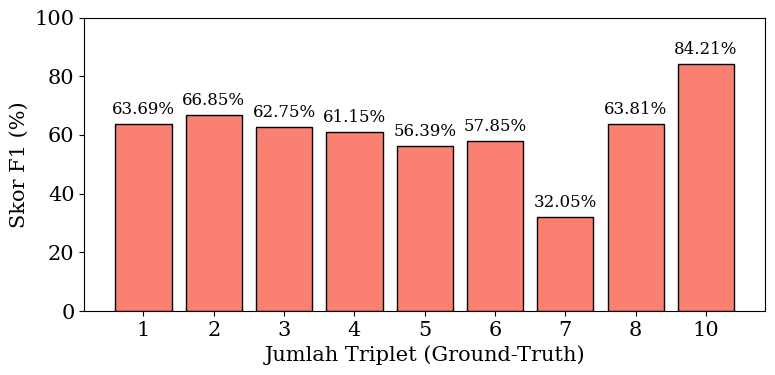

In [63]:
plt.figure(figsize=(8, 4))
bars = plt.bar(
    grouped_f1["Triplet_Count"].astype(str),
    grouped_f1["F1_pct"],
    color="salmon",
    edgecolor="black"
)
plt.ylim(0, 100)
plt.xlabel("Jumlah Triplet (Ground‐Truth)")
plt.ylabel("Skor F1 (%)")
# plt.title("Skor F1 Rata‐Rata per Jumlah Triplet")
plt.xticks(rotation=0)

# Tambahkan label persen di atas tiap batang
for bar in bars:
    h = bar.get_height()
    if not np.isnan(h):
        plt.text(
            bar.get_x() + bar.get_width()/2,
            h + 2.0,
            f"{h:.2f}%",
            ha="center",
            va="bottom",
            fontsize=12
        )

plt.tight_layout()
plt.savefig('akurasi_jumlah_triplet_per_ulasan.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import pandas as pd

# Filter df_cleaned untuk Triplet_Count = 7, 8, 10
filtered = df_cleaned[df_cleaned["Triplet_Count"].isin([7, 8, 10])].copy()

# Siapkan DataFrame untuk ditampilkan
display_df = filtered[["Sentence", "Triplet_Count", "True Triplets", "Predicted Triplets"]].copy()
display_df = display_df.rename(columns={
    "Text": "Ulasan",
    "Triplet_Count": "Jumlah Triplet",
    "True Triplets": "Triplet Benar (True)",
    "Predicted Triplets": "Triplet Prediksi (Predicted)"
})

from IPython.display import display
display(display_df)


,Sentence,Jumlah Triplet,Triplet Benar (True),Triplet Prediksi (Predicted)
5,salah satu tempat wisata keluarga yang asyik u...,8,"[{'Aspect': 'tempat wisata', 'Opinion': 'asyik...","[{'Aspect': 'tempat wisata keluarga', 'Opinion..."
69,recommended sebagai wisata murah yang enjoyabl...,8,"[{'Aspect': 'wisata', 'Opinion': 'murah', 'Pol...","[{'Aspect': 'tempatnya', 'Opinion': 'bersih', ..."
158,"tiket masuk 15k per orang , tempat indah dan i...",10,"[{'Aspect': 'tiket masuk', 'Opinion': '15k per...","[{'Aspect': 'tiket masuk', 'Opinion': '15k per..."
174,"harga terjangkau , ada tempat penyewaan pelamp...",8,"[{'Aspect': 'harga', 'Opinion': 'terjangkau', ...","[{'Aspect': 'harga', 'Opinion': 'terjangkau', ..."
313,harga tiket masuk 15k option : sewa snorkle 15...,7,"[{'Aspect': 'harga tiket masuk', 'Opinion': '1...","[{'Aspect': 'harga tiket masuk', 'Opinion': '1..."
364,"bagus , asri ada sawah , kolam ikan dan bebek ...",7,"[{'Aspect': 'sawah', 'Opinion': 'ada', 'Polari...","[{'Aspect': 'area', 'Opinion': 'luas sekali', ..."


#### Struktur Triplet ⋆˚🍒˚ ˚ ༘ ೀ⋆｡˚

In [42]:
# Hitung jumlah unique aspek dan jumlah unique opini per row (ground-truth)
def count_aspect_opinion(triplet_list):
    aspek_set = set()
    opini_set = set()
    for t in triplet_list:
        aspek_set.add(t.get("Aspect"))
        opini_set.add(t.get("Opinion"))
    return len(aspek_set), len(opini_set)

counts = df_cleaned["True Triplets"].apply(count_aspect_opinion)
df_cleaned["Num_Aspects"] = counts.apply(lambda x: x[0])
df_cleaned["Num_Opinions"] = counts.apply(lambda x: x[1])

In [43]:
# Kategorikan struktur triplet menjadi tiga label
def categorize_structure(row):
    na, no = row["Num_Aspects"], row["Num_Opinions"]
    if na == 1 and no == 1:
        return "A1O1"
    elif na == 1 and no > 1:
        return "A1OM"
    elif na > 1 and no == 1:
        return "AMO1"
    else:
        # untuk kasus na>1 dan no>1
        return "AMOM"

df_cleaned["Triplet_Structure"] = df_cleaned.apply(categorize_structure, axis=1)

In [ ]:
# Hitung jumlah ulasan per kategori
count_per_struct = (
    df_cleaned
    .groupby("Triplet_Structure")
    .size()
    .reset_index(name="Count")
    .sort_values("Triplet_Structure")
    .reset_index(drop=True)
)

# Hitung rata-rata F1 per kategori
grouped_f1_struct = (
    df_cleaned
    .groupby("Triplet_Structure")
    .agg({"F1": "mean"})
    .reset_index()
    .sort_values("Triplet_Structure")
    .reset_index(drop=True)
)
grouped_f1_struct["F1_pct"] = grouped_f1_struct["F1"] * 100

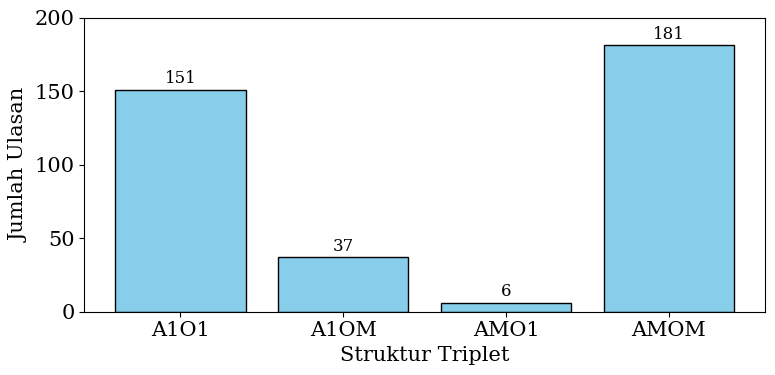

In [61]:
import matplotlib.pyplot as plt

# Ambil nilai maksimum untuk offset label
max_cnt = count_per_struct["Count"].max()

plt.figure(figsize=(8, 4))
bars = plt.bar(
    count_per_struct["Triplet_Structure"].astype(str),  # kategori di sumbu X
    count_per_struct["Count"],                          # tinggi batang di sumbu Y
    color="skyblue",
    edgecolor="black"
)

plt.xlabel("Struktur Triplet")
plt.ylabel("Jumlah Ulasan")
# plt.title("Jumlah Ulasan per Struktur Triplet")
plt.xticks(rotation=0)  

# Tambahkan label angka di atas setiap batang
for bar in bars:
    h = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # tengah batang
        h + max_cnt * 0.01,                # sedikit naikkan label
        f"{int(h)}",
        ha="center",
        va="bottom",
        fontsize=12
    )

plt.ylim(0, 200)
plt.tight_layout()
plt.savefig('jumlah_ulasan_per_struktur_triplet.png', dpi=300, bbox_inches='tight')
plt.show()

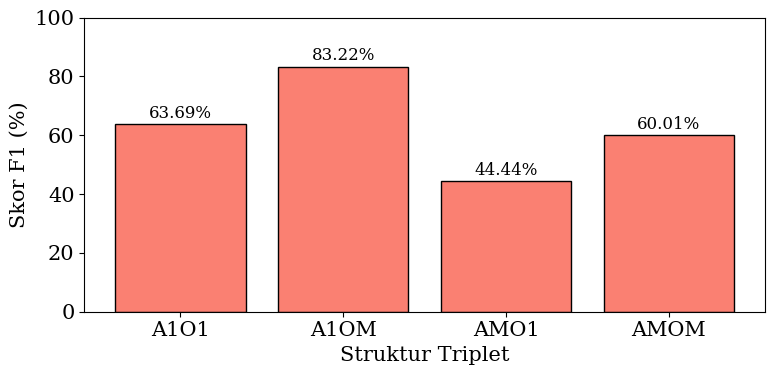

In [62]:
import matplotlib.pyplot as plt

# Ambil nilai maksimum untuk offset label
max_f1 = grouped_f1_struct["F1_pct"].max()

plt.figure(figsize=(8, 4))
bars = plt.bar(
    grouped_f1_struct["Triplet_Structure"].astype(str),  # kategori di sumbu X
    grouped_f1_struct["F1_pct"],                         # tinggi batang di sumbu Y
    color="salmon",
    edgecolor="black"
)

plt.xlabel("Struktur Triplet")
plt.ylabel("Skor F1 (%)")
# Kalau label x saling bertindih, miringkan sedikit:
plt.xticks(rotation=0)
plt.ylim(0, 100)

# Label persen di atas tiap batang
for bar in bars:
    h = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        h + max_f1 * 0.01,    # offset 1% dari maksimum F1
        f"{h:.2f}%",
        ha="center",
        va="bottom",
        fontsize=12
    )

plt.tight_layout()
# Simpan sebelum show agar layout benar
plt.savefig('akurasi_struktur_triplet_per_ulasan.png', dpi=300, bbox_inches='tight')
plt.show()


In [55]:
import pandas as pd

# Misal df_cleaned sudah tersedia dan memiliki kolom Triplet_Structure
filtered_many_many = df_cleaned[df_cleaned["Triplet_Structure"] == "many_aspect_1_opinion"].copy()

display_df_many_many = filtered_many_many[["Sentence", "True Triplets", "Predicted Triplets"]].copy()
display_df_many_many = display_df_many_many.rename(columns={
    "Text": "Ulasan",
    "True Triplets": "Triplet Benar (True)",
    "Predicted Triplets": "Triplet Prediksi (Predicted)"
})

from IPython.display import display
display(display_df_many_many)


,Sentence,Triplet Benar (True),Triplet Prediksi (Predicted)


In [56]:
# Simpan df_cleaned ke file CSV
file_path = "df_cleaned_eksplorasi_struktur_data.xlsx"  # atau path lengkap seperti "/mnt/data/df_cleaned.csv"
df_cleaned.to_excel(file_path, index=False)
print(f"DataFrame telah disimpan ke {file_path}")


DataFrame telah disimpan ke df_cleaned_eksplorasi_struktur_data.xlsx
